In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [48]:
df3 = pd.read_csv("../Diabetes-prediction-using-ML/helper/diabetes.csv")
df1 = pd.read_csv("../Diabetes-prediction-using-ML/helper/diabetes1.csv")
df2 = pd.read_csv("../Diabetes-prediction-using-ML/helper/diabetes2.csv")
df4 = pd.read_csv("../Diabetes-prediction-using-ML/helper/diabetes3.csv")
df2.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [49]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)


In [50]:
df.shape


(4304, 9)

In [51]:
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4299,10,101,76,48,180,32.9,0.171,63,0
4300,2,122,70,27,0,36.8,0.340,27,0
4301,5,121,72,23,112,26.2,0.245,30,0
4302,1,126,60,0,0,30.1,0.349,47,1
4303,1,93,70,31,0,30.4,0.315,23,0


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4304 entries, 0 to 4303
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               4304 non-null   int64  
 1   Glucose                   4304 non-null   int64  
 2   BloodPressure             4304 non-null   int64  
 3   SkinThickness             4304 non-null   int64  
 4   Insulin                   4304 non-null   int64  
 5   BMI                       4304 non-null   float64
 6   DiabetesPedigreeFunction  4304 non-null   float64
 7   Age                       4304 non-null   int64  
 8   Outcome                   4304 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 302.8 KB


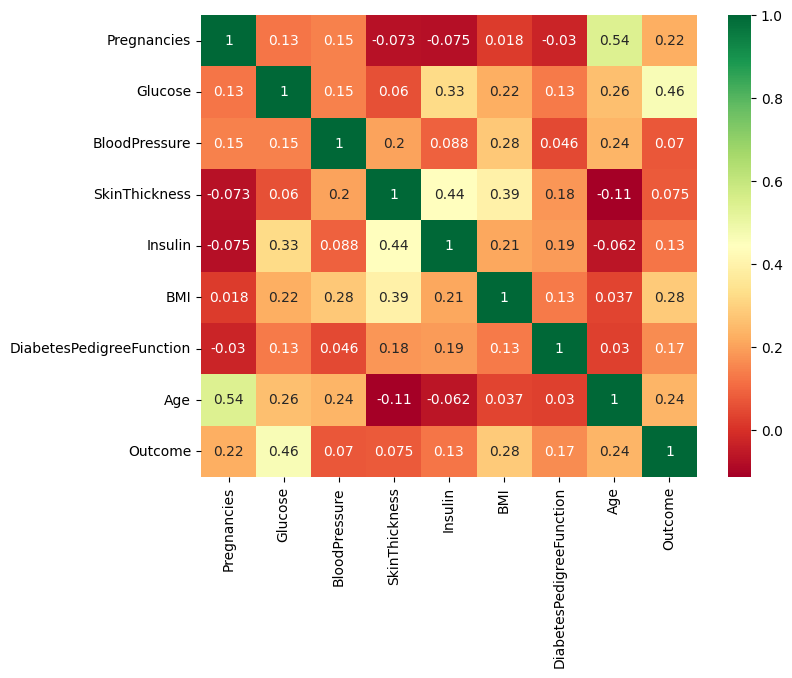

In [53]:
plt.figure(figsize=(8, 6))
x = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")


In [54]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000
mean,3.779275,121.028346,69.124071,20.721654,80.010688,32.085711,0.471437,33.171004,0.345725
std,3.339783,32.006450,19.271413,16.018251,113.333777,8.006627,0.327623,11.768549,0.475659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.100000,0.374500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.626000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [55]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
diabetes_df_copy = df.copy(deep=True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[[
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


In [57]:
print(diabetes_df_copy.isnull().sum())


Pregnancies                    0
Glucose                       28
BloodPressure                195
SkinThickness               1254
Insulin                     2078
BMI                           61
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


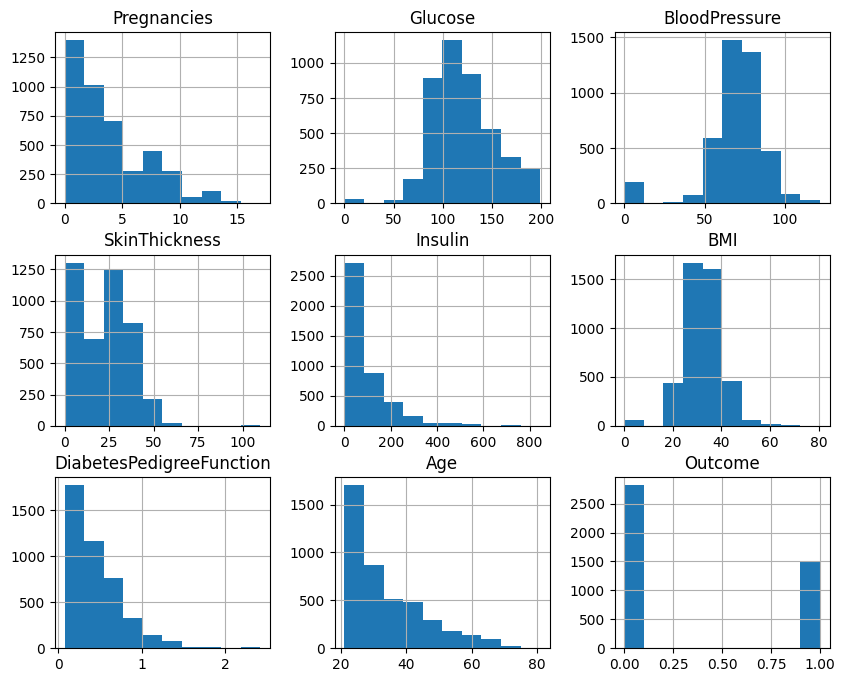

In [58]:
p = df.hist(figsize=(10, 8))


In [59]:
diabetes_df_copy['Glucose'].fillna(
    diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(
    diabetes_df_copy['BloodPressure'].mean(), inplace=True)
diabetes_df_copy['SkinThickness'].fillna(
    diabetes_df_copy['SkinThickness'].median(), inplace=True)
diabetes_df_copy['Insulin'].fillna(
    diabetes_df_copy['Insulin'].median(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace=True)


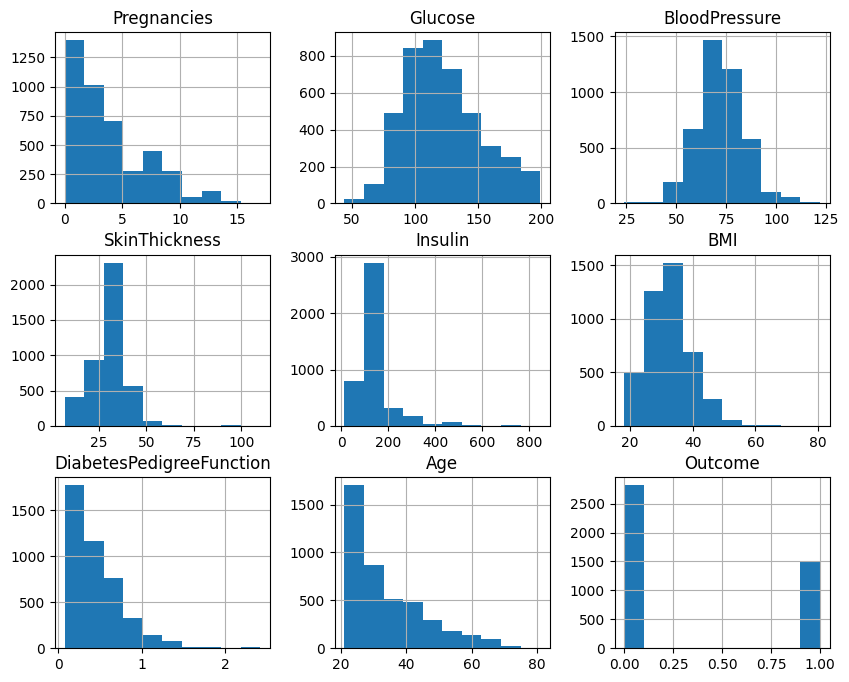

In [60]:
p = diabetes_df_copy.hist(figsize=(10, 8))


In [61]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
df["Outcome"].value_counts()


Outcome
0    2816
1    1488
Name: count, dtype: int64

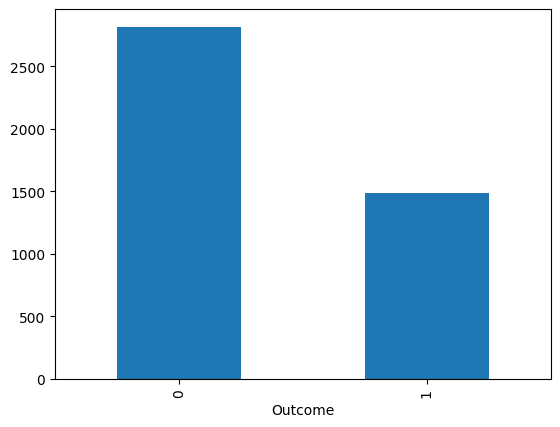

In [63]:
p = df.Outcome.value_counts().plot(kind="bar")


/tmp/ipykernel_178613/71425153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(df['Insulin'])


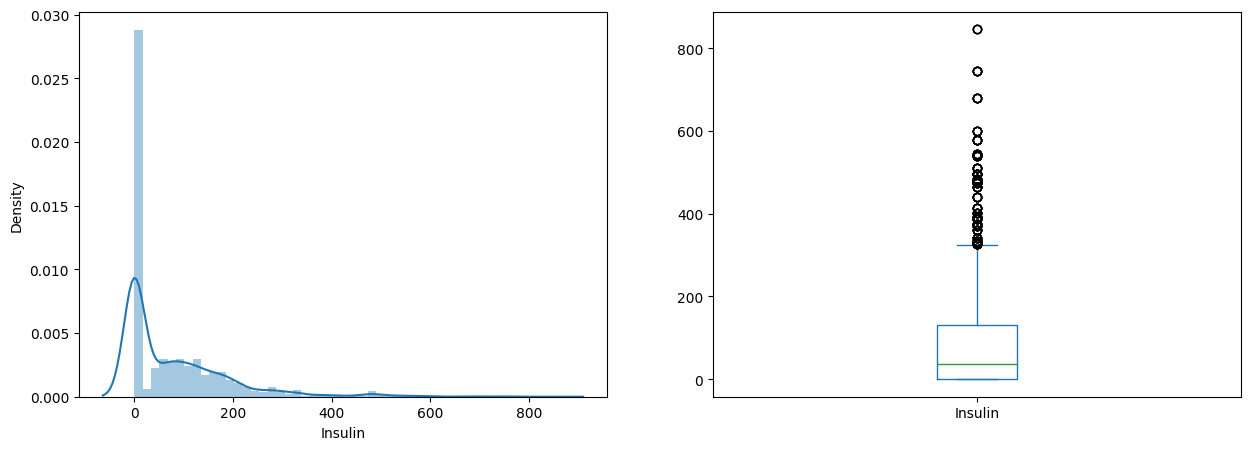

In [64]:
plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(15, 5))
plt.show()


In [65]:
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']


In [66]:
# STandardsing the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)


[[ 6.65008144e-01  8.42792246e-01  1.49250269e-01 ...  1.89151425e-01
   4.74880163e-01  1.43016366e+00]
 [-8.32269033e-01 -1.12578969e+00 -1.62127898e-01 ... -6.85225888e-01
  -3.67650280e-01 -1.84496483e-01]
 [ 1.26391901e+00  1.93644888e+00 -2.65920620e-01 ... -1.09743234e+00
   6.12249257e-01 -9.95143700e-02]
 ...
 [ 3.65552709e-01 -8.85728288e-04  1.49250269e-01 ... -7.35190306e-01
  -6.91230812e-01 -2.69478596e-01]
 [-8.32269033e-01  1.55350934e-01 -4.73506065e-01 ... -2.48037231e-01
  -3.73755573e-01  1.17521732e+00]
 [-8.32269033e-01 -8.75811035e-01  4.54575469e-02 ... -2.10563918e-01
  -4.77545555e-01 -8.64353385e-01]]


In [67]:
X = standardized_data
Y = df['Outcome']


In [68]:
print(x)


Axes(0.125,0.11;0.62x0.77)


In [69]:
print(Y)


0       1
1       0
2       1
3       0
4       1
       ..
4299    0
4300    0
4301    0
4302    1
4303    0
Name: Outcome, Length: 4304, dtype: int64


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2)


In [71]:
print(X.shape, X_train.shape, X_test.shape)


(4304, 8) (3443, 8) (861, 8)


In [72]:
# SVM
from sklearn import svm


In [73]:
classifier = svm.SVC(kernel='linear')


In [74]:
# training the support vector Machine Classifier
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

In [75]:
# accuracy score on the training data
from sklearn.metrics import accuracy_score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [76]:
print('Accuracy score of the training data : ', training_data_accuracy)


Accuracy score of the training data :  0.7763578274760383


In [77]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [78]:
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.7990708478513356


In [79]:
# Logistic regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)


LogisticRegression()

In [80]:
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on lr  training data : ', training_data_accuracy)
X_test_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on lr the test data : ', test_data_accuracy)


Accuracy score on lr  training data :  0.7781004937554459
Accuracy score on lr the test data :  0.7990708478513356


In [81]:
#  **  KNN ****
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)


KNeighborsClassifier()

In [82]:
X_train_prediction = KNN.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on KNN  training data : ', training_data_accuracy)
X_test_prediction = KNN.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on KNN the test data : ', test_data_accuracy)


Accuracy score on KNN  training data :  0.9924484461225676
Accuracy score on KNN the test data :  0.9709639953542393


In [83]:
#  DECISION TREE CLASSIFIER
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)


DecisionTreeClassifier()

In [84]:
X_train_prediction = DTC.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on DTC  training data : ', training_data_accuracy)
X_test_prediction = DTC.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on DTC the test data : ', test_data_accuracy)


Accuracy score on DTC  training data :  1.0
Accuracy score on DTC the test data :  0.9976771196283392


In [85]:
#  RANDOM FOREST CLASSIFIER
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)


RandomForestClassifier()

In [86]:
X_train_prediction = RFC.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on RFC  training data : ', training_data_accuracy)
X_test_prediction = RFC.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on RFC the test data : ', test_data_accuracy)


Accuracy score on RFC  training data :  1.0
Accuracy score on RFC the test data :  0.9976771196283392


In [87]:
#  MAKING PREDICTIVE SYSTEM

input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = KNN.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[[ 0.66500814  0.84279225  0.14925027  0.89148338 -0.70605592  0.18915143
   0.47488016  1.43016366]]
[1]
The person is diabetic


/home/chirag/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
